In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif ,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
import xgboost as xg
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , ConfusionMatrixDisplay
import pickle
import warnings
warnings.filterwarnings('ignore')
print('modules loaded')

modules loaded


In [2]:
df = pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1530544995,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df=df.drop(columns=['isFlaggedFraud','nameDest','nameOrig'])
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [8]:
df_0 = df[df['isFraud'] == 0] 
df_1 = df[df['isFraud'] == 1] 

df_0_sampled = df_0.sample(n=8213, random_state=42)
balanced_df = pd.concat([df_0_sampled, df_1])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
balanced_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,496,TRANSFER,766151.45,766151.45,0.00,0.00,0.00,1
1,365,TRANSFER,31315.51,31315.51,0.00,0.00,0.00,1
2,302,PAYMENT,19043.02,70067.00,51023.98,0.00,0.00,0
3,383,PAYMENT,11162.03,102921.00,91758.97,0.00,0.00,0
4,354,CASH_OUT,268851.80,220431.00,0.00,1641753.59,1910605.40,0
...,...,...,...,...,...,...,...,...
16421,273,TRANSFER,159106.12,159106.12,0.00,0.00,0.00,1
16422,336,TRANSFER,170038.31,170038.31,0.00,0.00,0.00,1
16423,18,CASH_OUT,8369.07,23265.00,14895.93,70063.42,78432.50,0
16424,249,CASH_IN,262120.50,8127067.18,8389187.68,407941.21,145820.71,0


In [9]:
balanced_df.describe(include='all')

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,16426.000000,16426,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,1.642600e+04,16426.000000
unique,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,7066,NaN,NaN,NaN,NaN,NaN,NaN
mean,306.441556,NaN,8.248655e+05,1.242838e+06,5.257872e+05,8.311948e+05,1.260807e+06,0.500000
std,193.321590,NaN,1.862573e+06,3.252860e+06,2.505016e+06,3.484266e+06,3.864760e+06,0.500015
min,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,161.000000,NaN,3.815791e+04,1.035827e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,283.000000,NaN,1.752676e+05,1.212709e+05,0.000000e+00,0.000000e+00,1.297782e+05,0.500000
75%,410.000000,NaN,5.404362e+05,7.979333e+05,0.000000e+00,5.283537e+05,1.091986e+06,1.000000


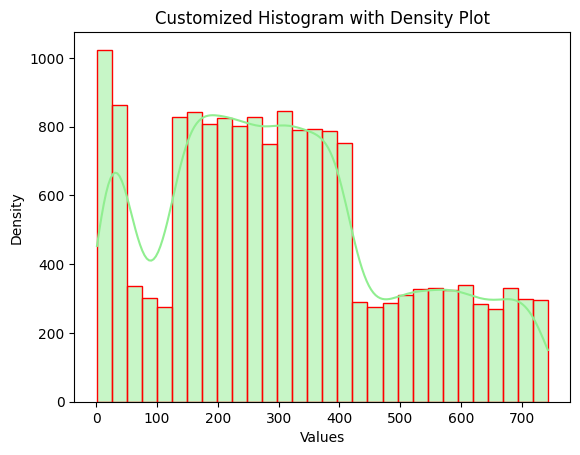

In [10]:
# Creating a customized histogram with a density plot
sns.histplot(balanced_df['step'], bins=30, kde=True, color='lightgreen', edgecolor='red')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Customized Histogram with Density Plot')

# Display the plot
plt.show()


In [11]:
type_count =balanced_df['type'].value_counts()
type_count

type
CASH_OUT    7066
TRANSFER    4750
PAYMENT     2735
CASH_IN     1825
DEBIT         50
Name: count, dtype: int64

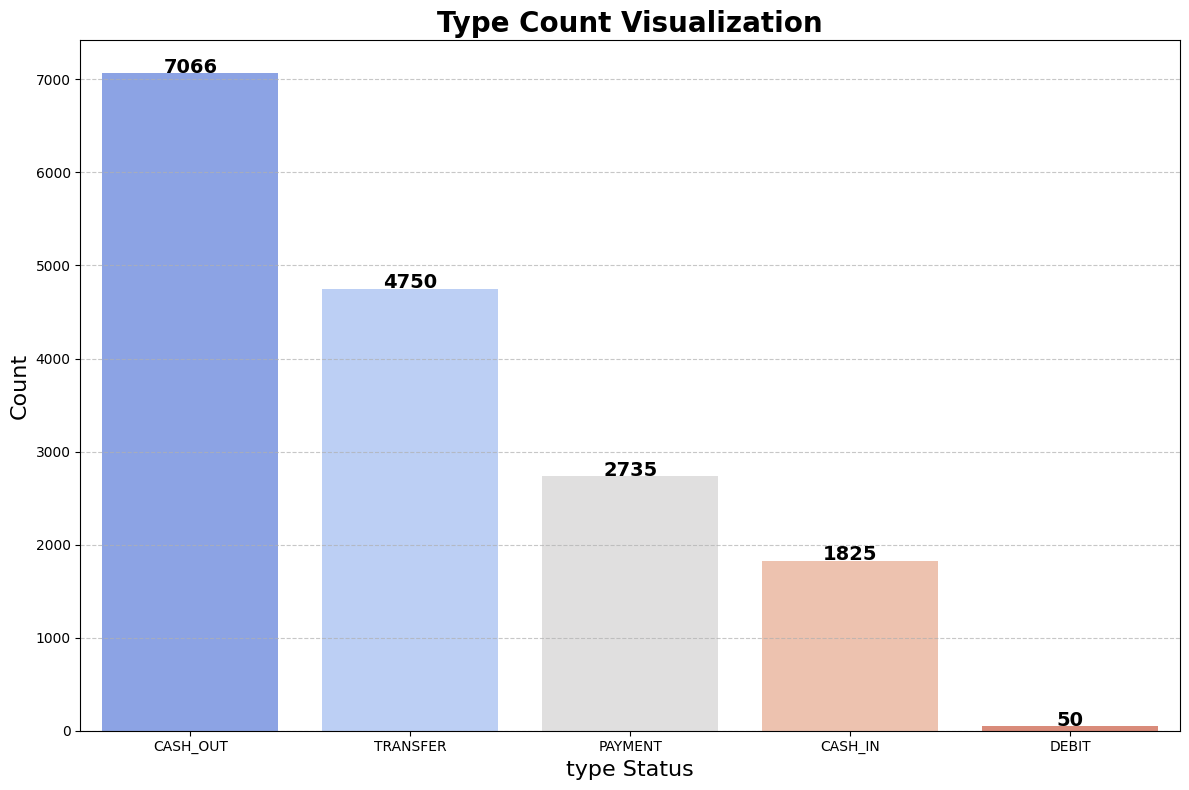

In [12]:
# Create a figure
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x=type_count.index, y=type_count.values, palette='coolwarm', alpha=0.9)

# Add title and labels
plt.title('Type Count Visualization', fontsize=20, fontweight='bold')
plt.xlabel('type Status', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Annotate bars with their values
for index, value in enumerate(type_count.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=14, color='black', fontweight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

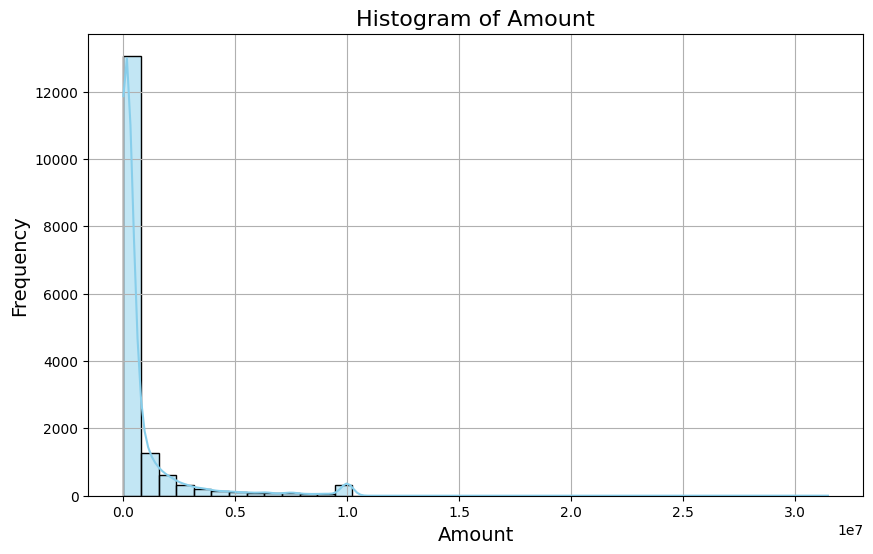

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(balanced_df['amount'], bins=40, kde=True, color='skyblue')
plt.title('Histogram of Amount', fontsize=16)
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

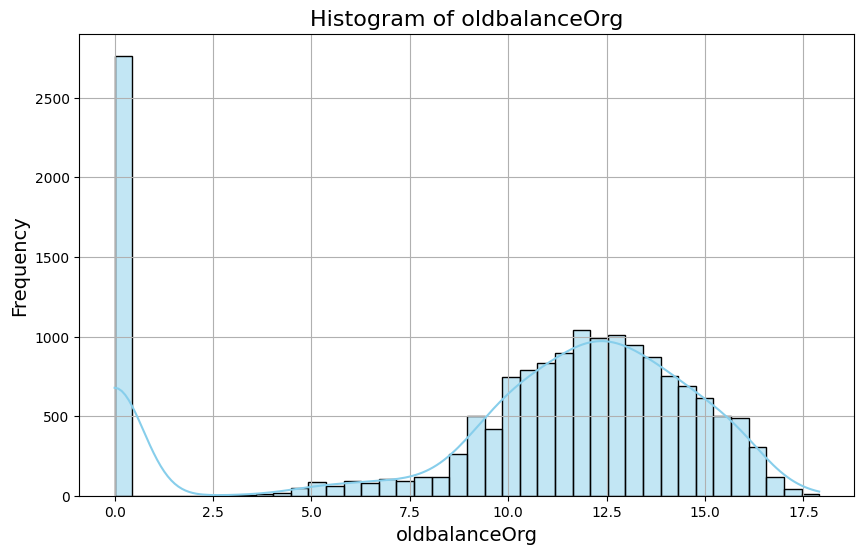

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(balanced_df['oldbalanceOrg']), bins=40, kde=True, color='skyblue')
plt.title('Histogram of oldbalanceOrg', fontsize=16)
plt.xlabel('oldbalanceOrg', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

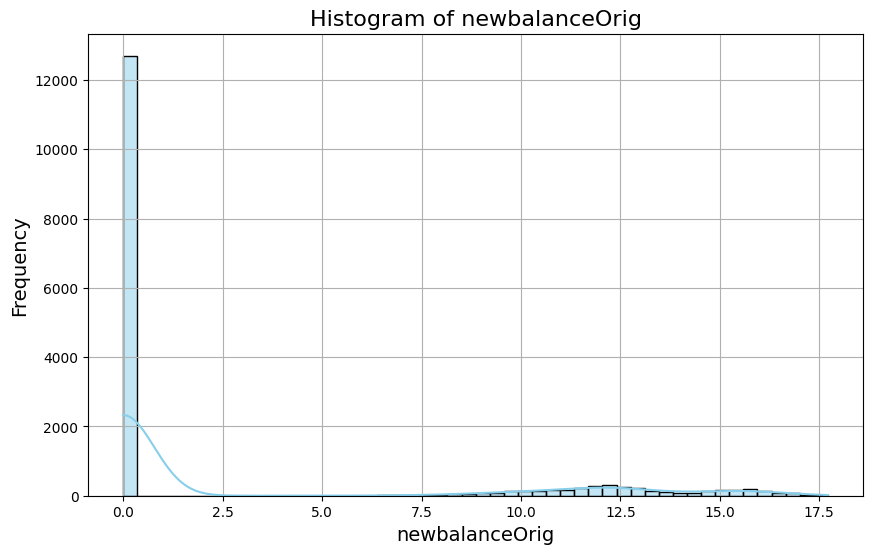

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(balanced_df['newbalanceOrig']), bins=50, kde=True, color='skyblue')
plt.title('Histogram of newbalanceOrig', fontsize=16)
plt.xlabel('newbalanceOrig', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

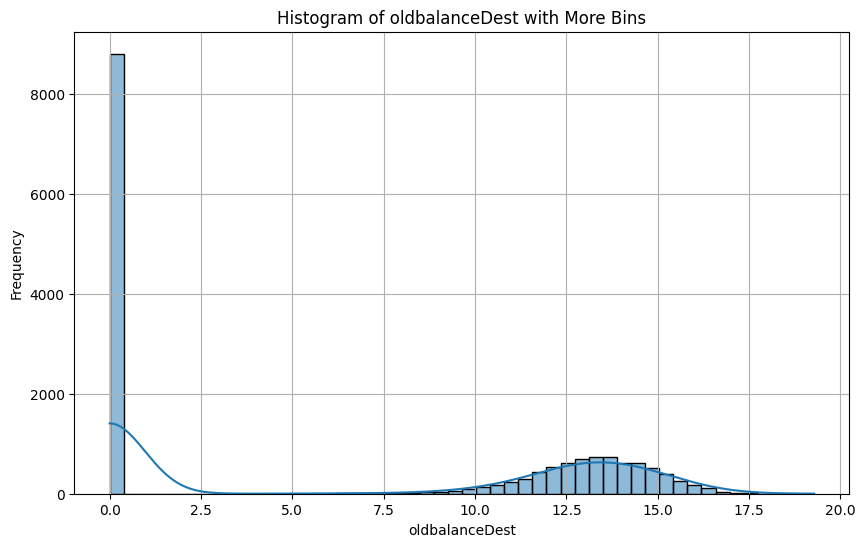

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(balanced_df['oldbalanceDest']), bins=50, kde=True)
plt.title("Histogram of oldbalanceDest with More Bins")
plt.xlabel("oldbalanceDest")
plt.ylabel("Frequency")
plt.grid()
plt.show()

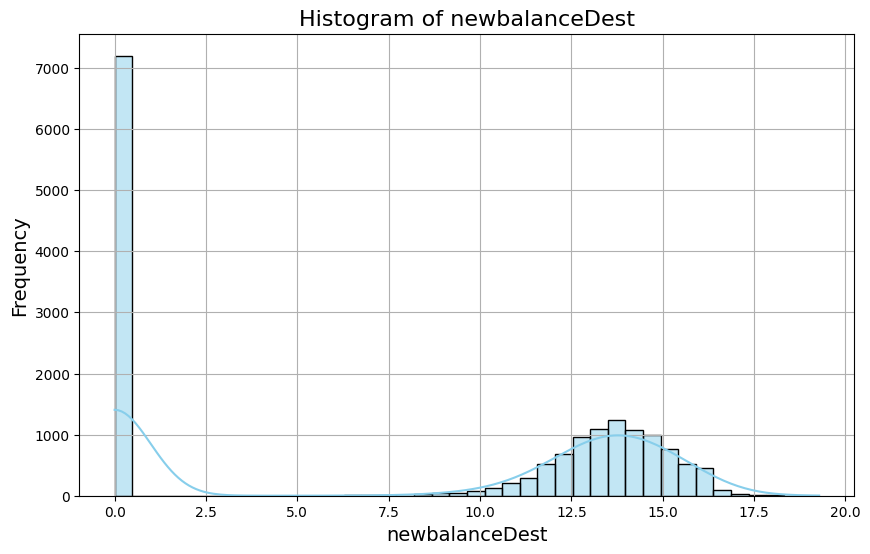

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(balanced_df['newbalanceDest']), bins=40, kde=True, color='skyblue')
plt.title('Histogram of newbalanceDest', fontsize=16)
plt.xlabel('newbalanceDest', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid()
plt.show()

In [18]:
fraud_count =balanced_df['isFraud'].value_counts()
fraud_count

isFraud
1    8213
0    8213
Name: count, dtype: int64

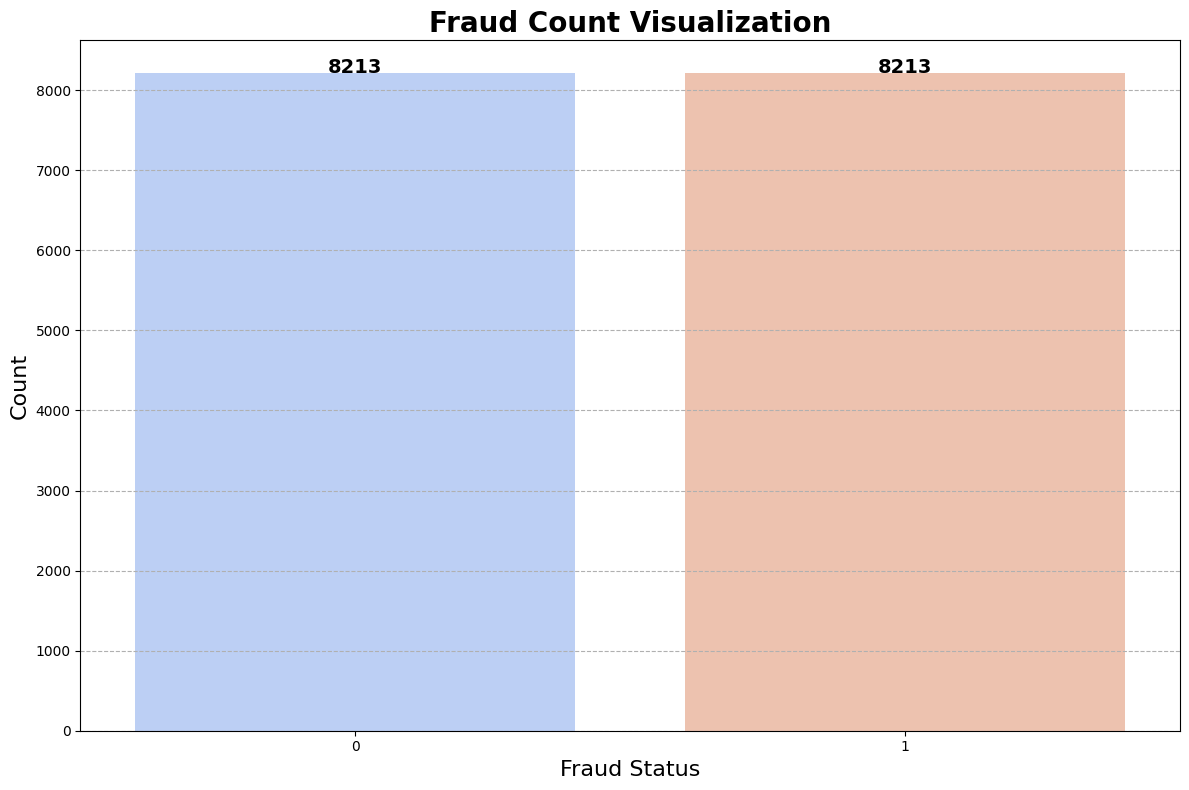

In [19]:
# Create a figure
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(x=fraud_count.index, y=fraud_count.values, palette='coolwarm', alpha=0.9)

# Add title and labels
plt.title('Fraud Count Visualization', fontsize=20, fontweight='bold')
plt.xlabel('Fraud Status', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Annotate bars with their values
for index, value in enumerate(fraud_count.values):
    plt.text(index, value + 5, str(value), ha='center', fontsize=14, color='black', fontweight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

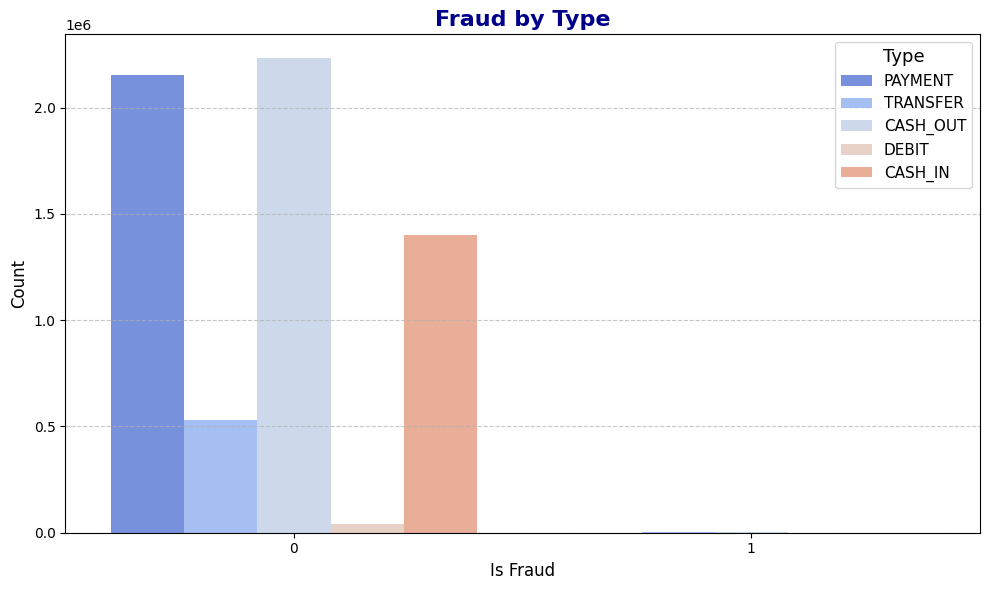

In [20]:
# Set a more vibrant color palette
palette = sns.color_palette("coolwarm")

# Create the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x="isFraud", hue="type", palette=palette)

# Add annotations for each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', fontsize=10, color='white', 
                xytext=(0, 5), textcoords='offset points')

# Customize the title and labels
plt.title("Fraud by Type", fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel("Is Fraud", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.legend(title='Type', title_fontsize='13', fontsize='11')
plt.tight_layout()
plt.show()

In [21]:
columns_onehot=['type']
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(balanced_df[columns_onehot])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(columns_onehot))
balanced_df = pd.concat([balanced_df.reset_index(drop=True), one_hot_df.reset_index(drop=True)], axis=1)
balanced_df = balanced_df.drop(columns_onehot, axis=1)

In [22]:
balanced_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,496,766151.45,766151.45,0.00,0.00,0.00,1,0.0,0.0,0.0,0.0,1.0
1,365,31315.51,31315.51,0.00,0.00,0.00,1,0.0,0.0,0.0,0.0,1.0
2,302,19043.02,70067.00,51023.98,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
3,383,11162.03,102921.00,91758.97,0.00,0.00,0,0.0,0.0,0.0,1.0,0.0
4,354,268851.80,220431.00,0.00,1641753.59,1910605.40,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16421,273,159106.12,159106.12,0.00,0.00,0.00,1,0.0,0.0,0.0,0.0,1.0
16422,336,170038.31,170038.31,0.00,0.00,0.00,1,0.0,0.0,0.0,0.0,1.0
16423,18,8369.07,23265.00,14895.93,70063.42,78432.50,0,0.0,1.0,0.0,0.0,0.0
16424,249,262120.50,8127067.18,8389187.68,407941.21,145820.71,0,1.0,0.0,0.0,0.0,0.0


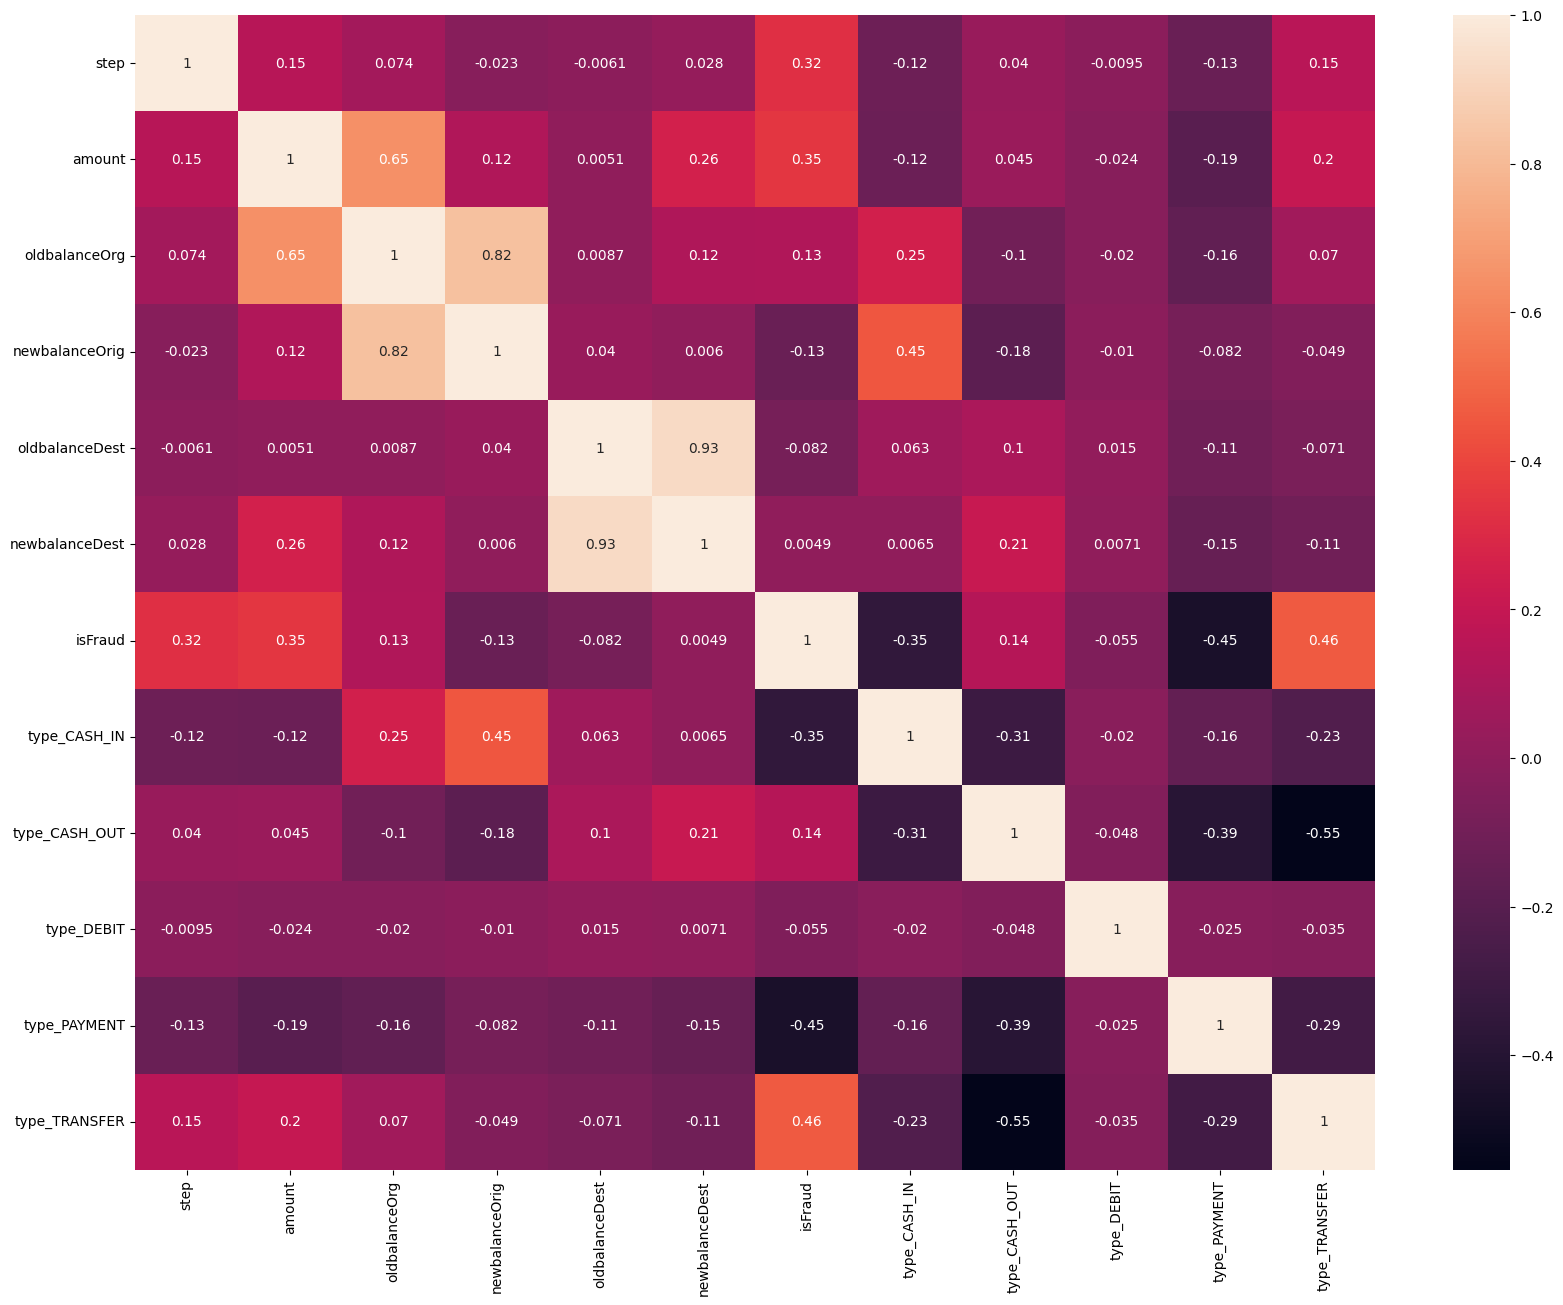

In [23]:
plt.figure(figsize=(20 ,15))
sns.heatmap(balanced_df.corr(), annot=True)
plt.show()

In [24]:
x=balanced_df.drop('isFraud',axis=1)
y=balanced_df[['isFraud']]

In [25]:
scaler=MinMaxScaler()

In [26]:
model = LogisticRegression()

rfe = RFE(estimator=model, n_features_to_select=5)
x_new = rfe.fit_transform(x, y)

selected_features = x.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')


In [27]:
x_new=scaler.fit_transform(x_new)

In [28]:
X_train_w,X_test_w,y_train_w,y_test_w=train_test_split(x_new,y,test_size=0.2,random_state=42,stratify=y)

## logistic Regression

In [29]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
lR=GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
lR.fit(X_train_w,y_train_w)
best_model = lR.best_estimator_

In [30]:
best_model.score(X_train_w,y_train_w)

0.8669710806697108

In [31]:
ypred_lR=best_model.predict(X_test_w)

In [32]:
print(accuracy_score(y_test_w,ypred_lR))

0.8706634205721242


[[1570   73]
 [ 352 1291]]


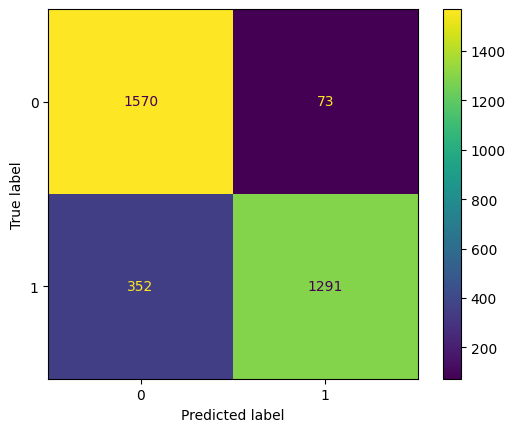

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_lR)
print(confusion_matrix(y_test_w, ypred_lR))

In [34]:
print(classification_report(y_test_w,ypred_lR))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1643
           1       0.95      0.79      0.86      1643

    accuracy                           0.87      3286
   macro avg       0.88      0.87      0.87      3286
weighted avg       0.88      0.87      0.87      3286



## Decision Tree

In [35]:
Dt=DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split= 5)
Dt.fit(X_train_w,y_train_w)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5)

In [36]:
Dt.score(X_train_w,y_train_w)

0.9863774733637747

In [37]:
ypred_Dt=Dt.predict(X_test_w)

In [38]:
print(accuracy_score(y_test_w,ypred_Dt))

0.9558734023128423


[[1579   64]
 [  81 1562]]


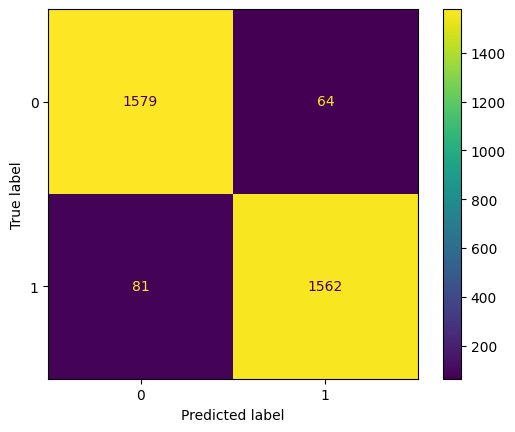

In [39]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_Dt)
print(confusion_matrix(y_test_w, ypred_Dt))

In [40]:
print(classification_report(y_test_w,ypred_Dt))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1643
           1       0.96      0.95      0.96      1643

    accuracy                           0.96      3286
   macro avg       0.96      0.96      0.96      3286
weighted avg       0.96      0.96      0.96      3286



## RandomForest

In [41]:
Rf=RandomForestClassifier()
Rf.fit(X_train_w,y_train_w)

RandomForestClassifier()

In [42]:
Rf.score(X_train_w,y_train_w)

0.9998477929984779

In [43]:
ypred_Rf=Rf.predict(X_test_w)

In [44]:
print(accuracy_score(y_test_w,ypred_Rf))

0.9589166159464394


[[1574   69]
 [  66 1577]]


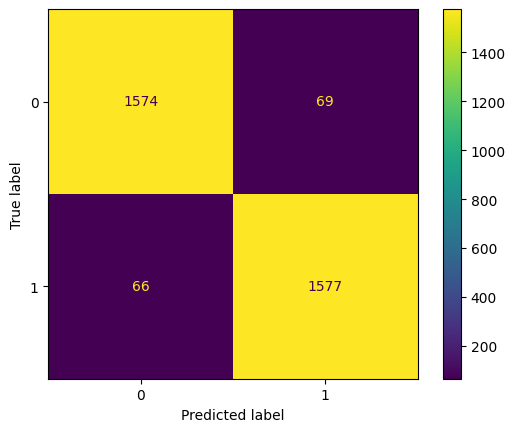

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_Rf)
print(confusion_matrix(y_test_w, ypred_Rf))

In [46]:
print(classification_report(y_test_w,ypred_Rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1643
           1       0.96      0.96      0.96      1643

    accuracy                           0.96      3286
   macro avg       0.96      0.96      0.96      3286
weighted avg       0.96      0.96      0.96      3286



## GradientBoosting

In [47]:
Gb=GradientBoostingClassifier(learning_rate= 0.1, max_depth=7, n_estimators= 150)
Gb.fit(X_train_w,y_train_w)

GradientBoostingClassifier(max_depth=7, n_estimators=150)

In [48]:
Gb.score(X_train_w,y_train_w)

0.9971080669710807

In [49]:
ypred_Gb=Gb.predict(X_test_w)

In [50]:
print(accuracy_score(y_test_w,ypred_Gb))

0.965611685940353


[[1586   57]
 [  56 1587]]


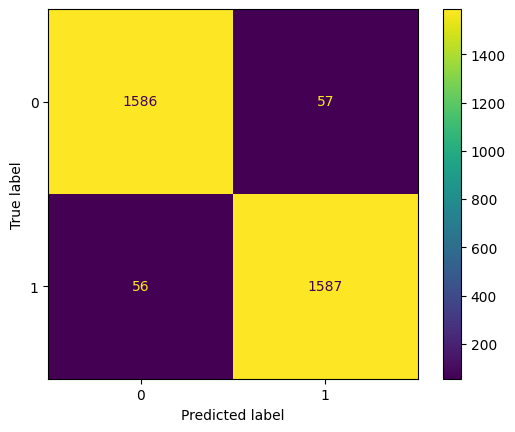

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_Gb)
print(confusion_matrix(y_test_w, ypred_Gb))

In [52]:
print(classification_report(y_test_w,ypred_Gb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1643
           1       0.97      0.97      0.97      1643

    accuracy                           0.97      3286
   macro avg       0.97      0.97      0.97      3286
weighted avg       0.97      0.97      0.97      3286



## XGCLassifier

In [53]:
XGb=xg.XGBClassifier(learning_rate= 0.2, max_depth=7, n_estimators= 150)
XGb.fit(X_train_w,y_train_w)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [54]:
XGb.score(X_train_w,y_train_w)

0.9933789954337899

In [55]:
ypred_Xgb=XGb.predict(X_test_w)

In [56]:
print(accuracy_score(y_test_w,ypred_Xgb))

0.9671332927571515


[[1591   52]
 [  56 1587]]


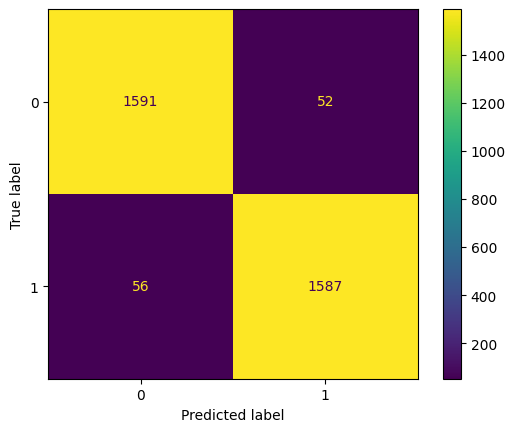

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test_w, ypred_Xgb)
print(confusion_matrix(y_test_w, ypred_Xgb))

In [58]:
print(classification_report(y_test_w,ypred_Xgb))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1643
           1       0.97      0.97      0.97      1643

    accuracy                           0.97      3286
   macro avg       0.97      0.97      0.97      3286
weighted avg       0.97      0.97      0.97      3286



## use Grid search in models

In [59]:
models = {
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": xg.XGBClassifier(),
    "Decisiontree":DecisionTreeClassifier()
}

In [60]:
param_grids = {
    "RandomForest": {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "LogisticRegression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga']
    },
    "GradientBoosting": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "Decisiontree":{
        'criterion': ['gini', 'entropy'],  
        'max_depth': [5, 10, 15],  
        'min_samples_split': [2, 5, 10]
    }
}

In [61]:
best_models = {}
for model_name in models:
    print(f"Performing Grid Search for {model_name}...")
    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=param_grids[model_name],
        scoring='accuracy',
        cv=5,  
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train_w, y_train_w)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best CV accuracy for {model_name}: {grid_search.best_score_:.4f}")

Performing Grid Search for RandomForest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Best parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best CV accuracy for RandomForest: 0.9604
Performing Grid Search for LogisticRegression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best parameters for LogisticRegression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy for LogisticRegression: 0.8107
Performing Grid Search for GradientBoosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

Best parameters for GradientBoosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}
Best CV accuracy for GradientBoosting: 0.9658
Performing Grid Search for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
Best CV accuracy for XGBoost: 0.9646
Performing Grid Search for Decisiontree...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Decisiontree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
Best CV accuracy for Decisiontree: 0.9530


In [62]:
print("\nTesting the best models on the full dataset...")
for model_name, model in best_models.items():
    y_pred = model.predict(X_test_w)
    accuracy = accuracy_score(y_test_w, y_pred)
    print(f"{model_name} accuracy: {accuracy:.4f}")


Testing the best models on the full dataset...
RandomForest accuracy: 0.9610
LogisticRegression accuracy: 0.8284
GradientBoosting accuracy: 0.9647
XGBoost accuracy: 0.9668
Decisiontree accuracy: 0.9537


## save model

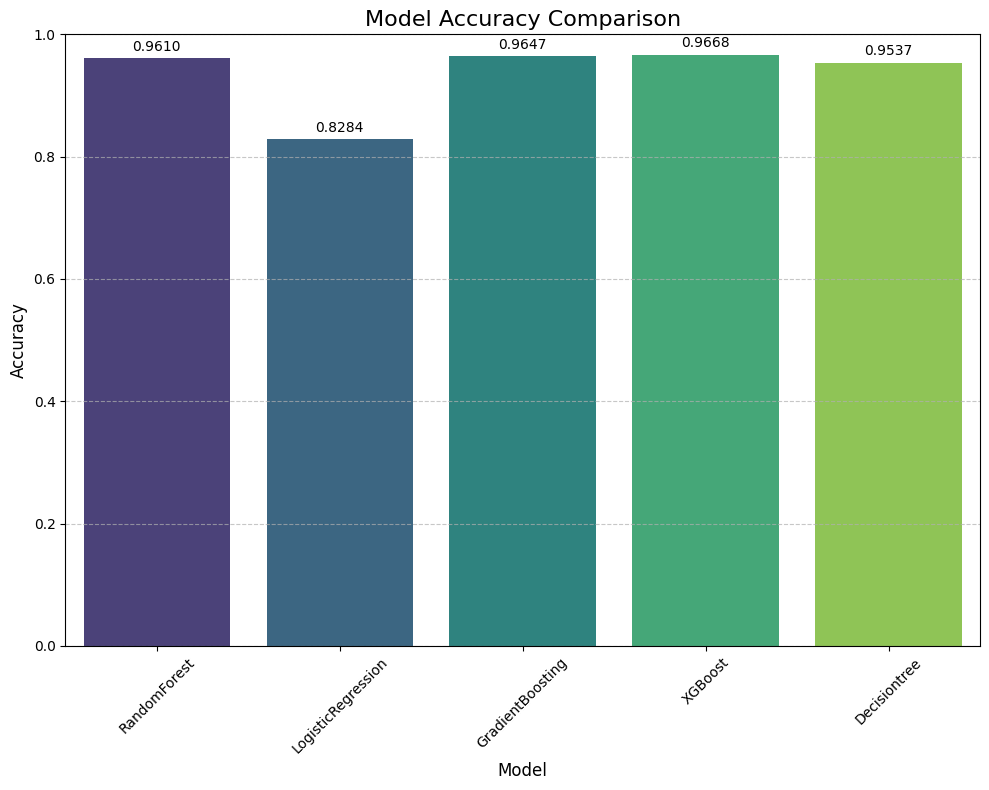

In [63]:
# Gather accuracy scores for the best models
model_names = list(best_models.keys())
accuracies = []

# Testing the best models on the full dataset to get their accuracies
for model_name in model_names:
    y_pred = best_models[model_name].predict(X_test_w)
    accuracy = accuracy_score(y_test_w, y_pred)
    accuracies.append(accuracy)

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
})

# Set the aesthetics for the plot
plt.figure(figsize=(10, 8))
bar_plot = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Add accuracy labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.4f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=10, color='black', 
                      xytext=(0, 3), textcoords='offset points')  # Adjusted y offset

# Show the plot
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to make room for labels
plt.show()

In [64]:
with open('XGb_model.pkl', 'wb') as model_file:
        pickle.dump(XGb, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

In [ ]:
# Load the saved model and scaler
with open('XGb_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Example input data for prediction (replace with your actual data)
example_data = np.array([[1, 10000, 20000, 30000, 40000, 50000, 0, 1, 0, 0]])

# Scale the input data
scaled_data = loaded_scaler.transform(example_data)

# Make predictions
predictions = loaded_model.predict(scaled_data)
print("Predictions:", predictions)

In [ ]:
# Example input data for prediction
# The columns are: step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, type_CASH_IN, type_CASH_OUT, type_DEBIT, type_PAYMENT
example_data = np.array([
    [1, 10000, 20000, 30000, 40000, 50000, 0, 1, 0, 0],  # Sample 1
    [2, 15000, 25000, 35000, 45000, 55000, 1, 0, 0, 0]   # Sample 2
])

# Scale the input data
scaled_data = loaded_scaler.transform(example_data)

# Make predictions
predictions = loaded_model.predict(scaled_data)

# Print predictions
print("Predictions:", predictions)